<a href="https://colab.research.google.com/github/karenpinto1602/Machine-Learning-4020/blob/Act3/smv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Training Input
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
Categories = ['Elephant', 'Horse']
flat_data_arr = []  # input array
target_arr = []  # output array
datadir = '/content/data'
# path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)  # dataframe
df['Target'] = target
x = df.iloc[:, :-1]  # input data
y = df.iloc[:, -1]  # output data




loading... category : Elephant
loaded category:Elephant successfully
loading... category : Horse
loaded category:Horse successfully


In [ ]:
# Model Construction
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [
    0.0001, 0.001, 0.1, 1], 'kernel': ['rbf', 'poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)


In [ ]:
# Model Training
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=77, stratify=y)
print('Splitted Successfully')
model.fit(x_train, y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV


Splitted Successfully
The Model is trained well with the given images


In [ ]:
# Model Testing
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0]
The actual data is:
[1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0]
The model is 97.5% accurate


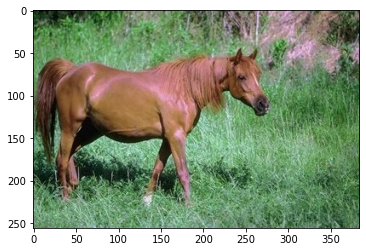

Elephant = 1.2681185713541643%
Horse = 98.73188142864582%
The predicted image is : Horse


In [ ]:
# Model Evaluation
url = '/content/703.jpg'
#input('Enter URL of Image :')
img = imread(url)
plt.imshow(img)
plt.show()
img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]
probability = model.predict_proba(l)
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [ ]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.952


In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 1.000


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.975


In [ ]:
from sklearn.metrics import f1_score
print('F-Measure: %.3f' % (f1_score(y_test, y_pred)*100),'%')

F-Measure: 97.561 %
